# Flight Fare Prediction

## 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 2. Load Dataset

In [2]:
Train_data = pd.read_excel("Data_Train.xlsx")
Test_data = pd.read_excel("Test_set.xlsx")

In [3]:
print("Train_data size:",Train_data.shape)
print("Test_data size:",Test_data.shape)

Train_data size: (10683, 11)
Test_data size: (2671, 10)


In [4]:
flight_df = Train_data.append(Test_data,sort=False)
flight_df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  
4    16:50         21:35   4h 45m      1 stop         No info  13302.0

## 3. Data Inspection

### Dataset shape

In [5]:
flight_df.shape

(13354, 11)

### Dataset Information

In [6]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [7]:
flight_df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

## 4. EDA

In [8]:
order=flight_df["Airline"].value_counts().index
order

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object')

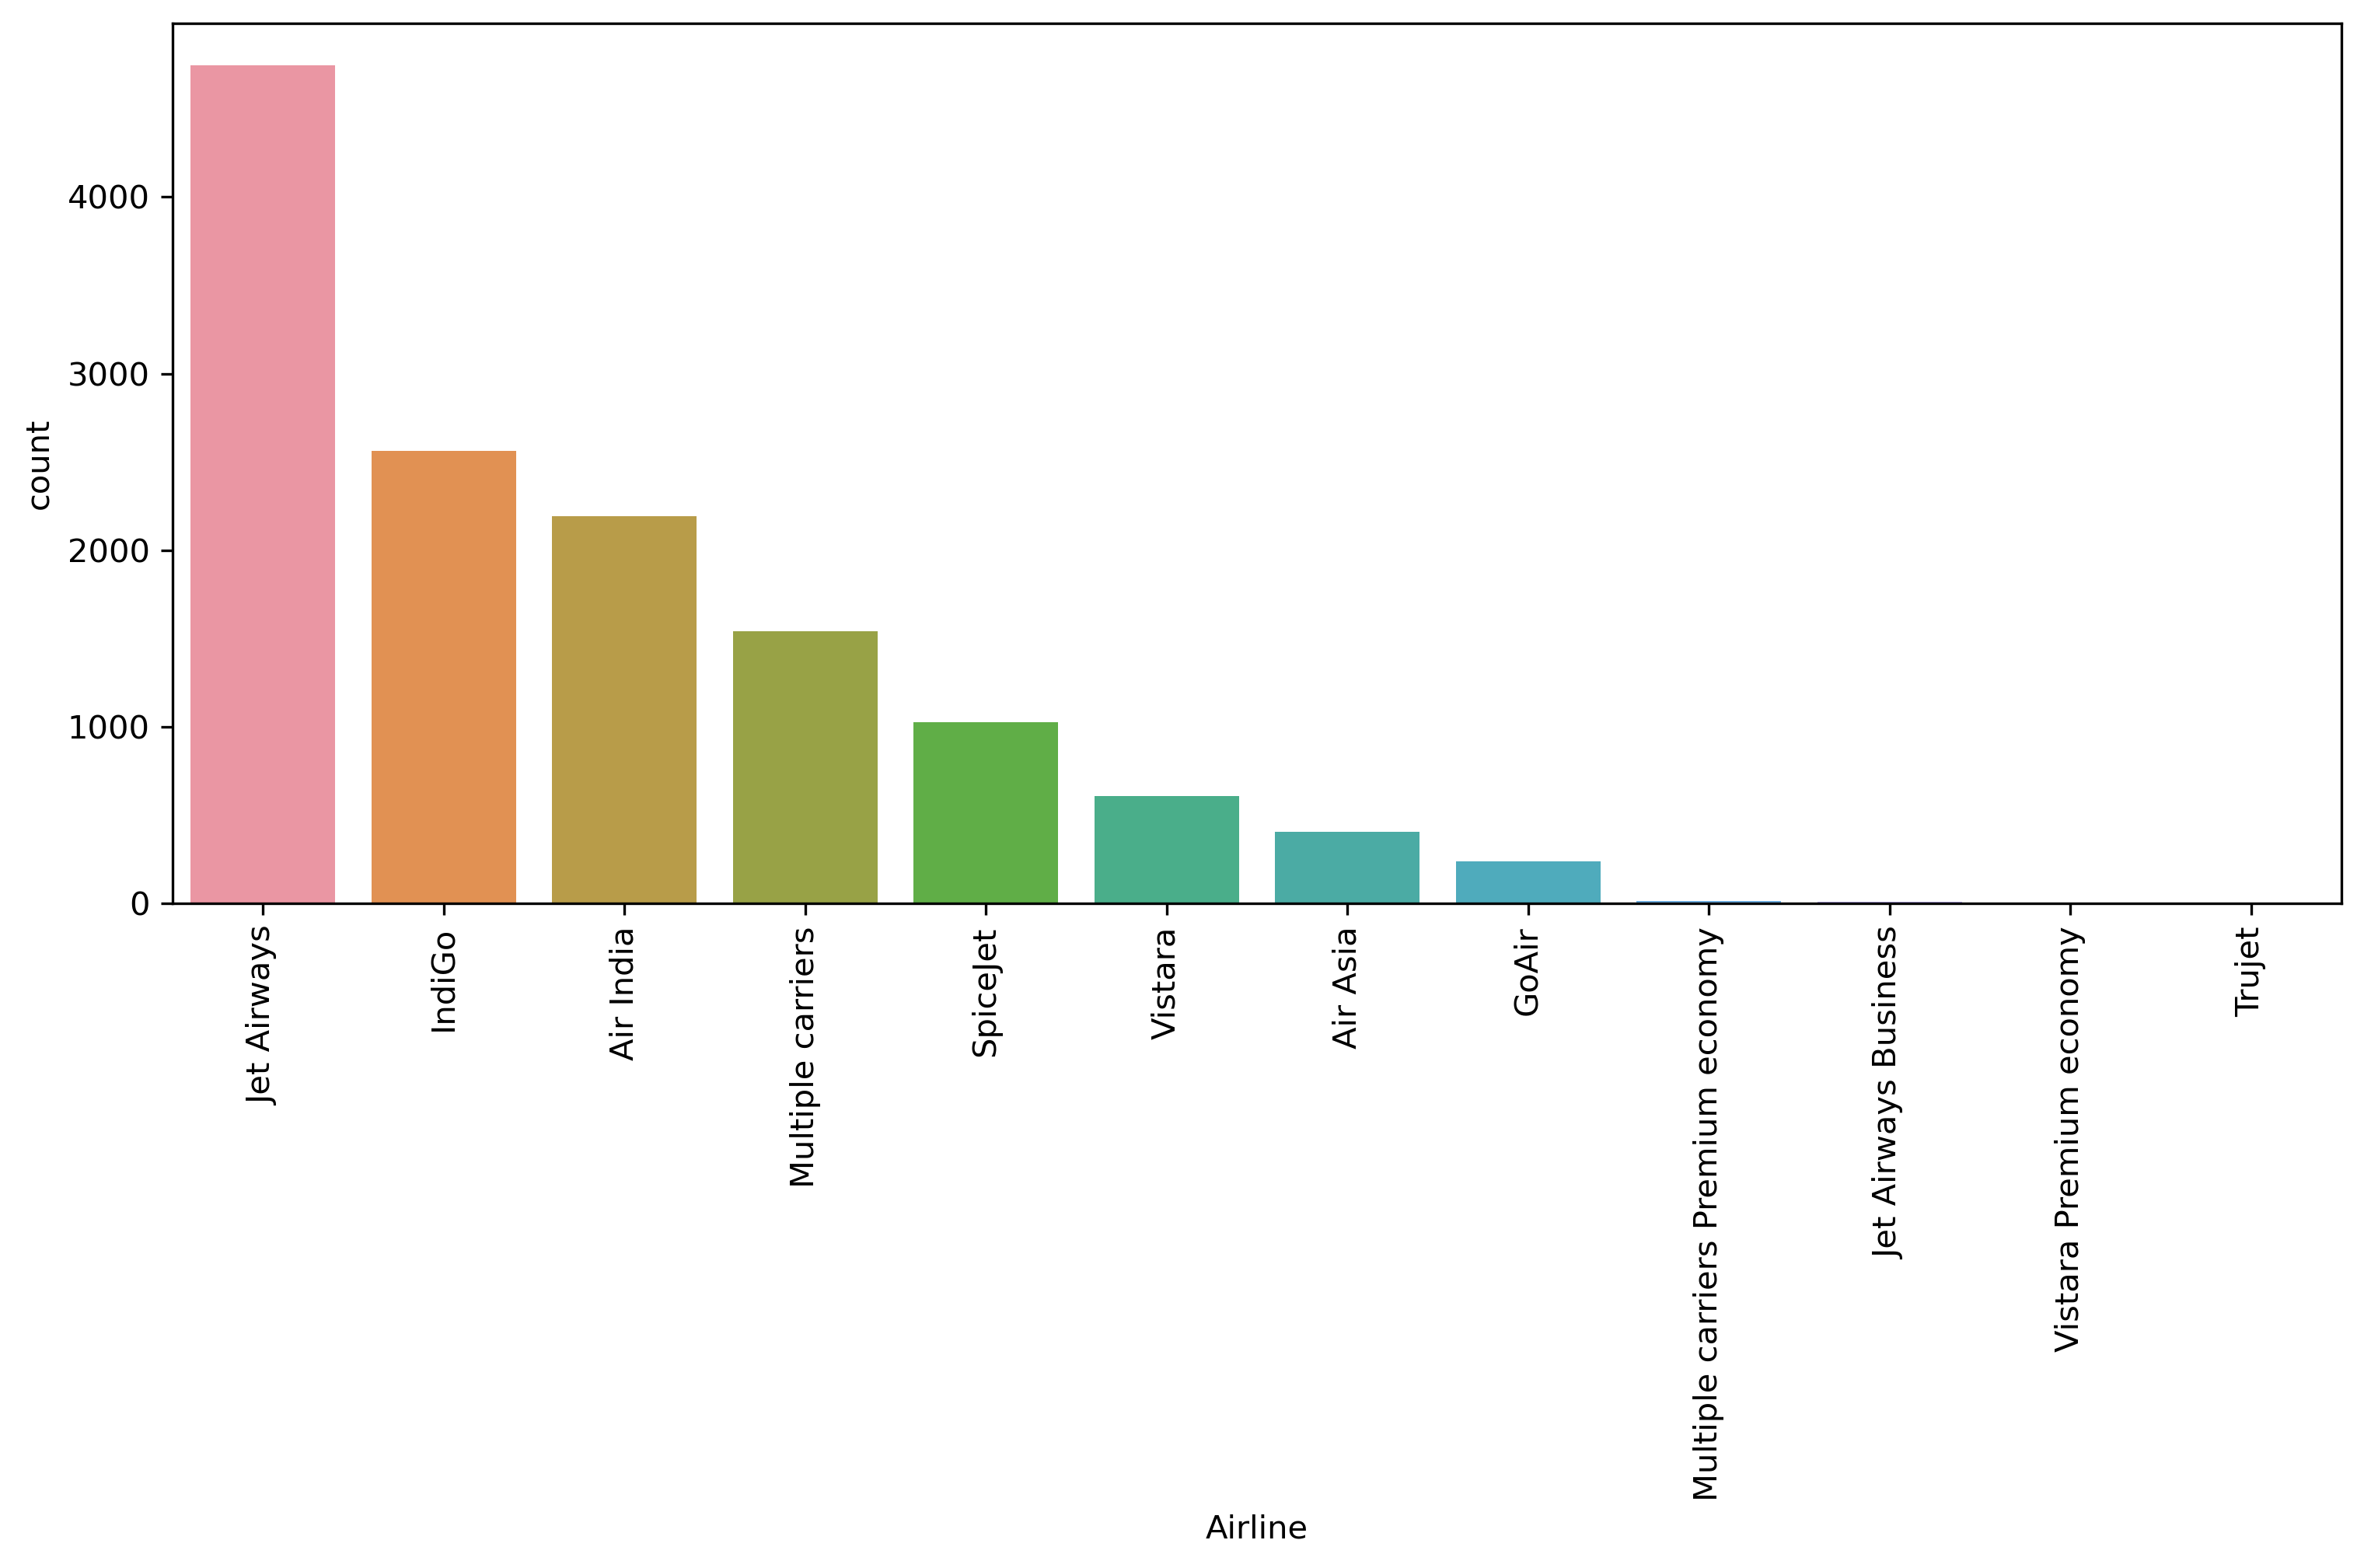

In [9]:
plt.figure(figsize=(12,5),dpi=300) #dpi dots per inch
sns.countplot(x="Airline",data=flight_df,order=flight_df["Airline"].value_counts().index)
plt.xticks(rotation=90)
plt.show()


## Airlines vs ticket price

In [10]:
flight_df.head(3)

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0

In [11]:
airlines = flight_df.groupby('Airline').Price.max() # Grouping the data and finding the maximum price for each airline
airlines_df = airlines.to_frame().sort_values('Price',ascending=False) # Creating a DataFrame from the groupby result and sorting it in descending order
airlines_df

Price
Airline                                   
Jet Airways Business               79512.0
Jet Airways                        54826.0
Multiple carriers                  36983.0
Air India                          31945.0
SpiceJet                           23267.0
GoAir                              22794.0
IndiGo                             22153.0
Vistara                            21730.0
Multiple carriers Premium economy  14629.0
Air Asia                           13774.0
Vistara Premium economy            11793.0
Trujet                              4140.0

## Airlines vs ticket price using Python data visualization libraries

### Airlines vs ticket price using matplotlib library

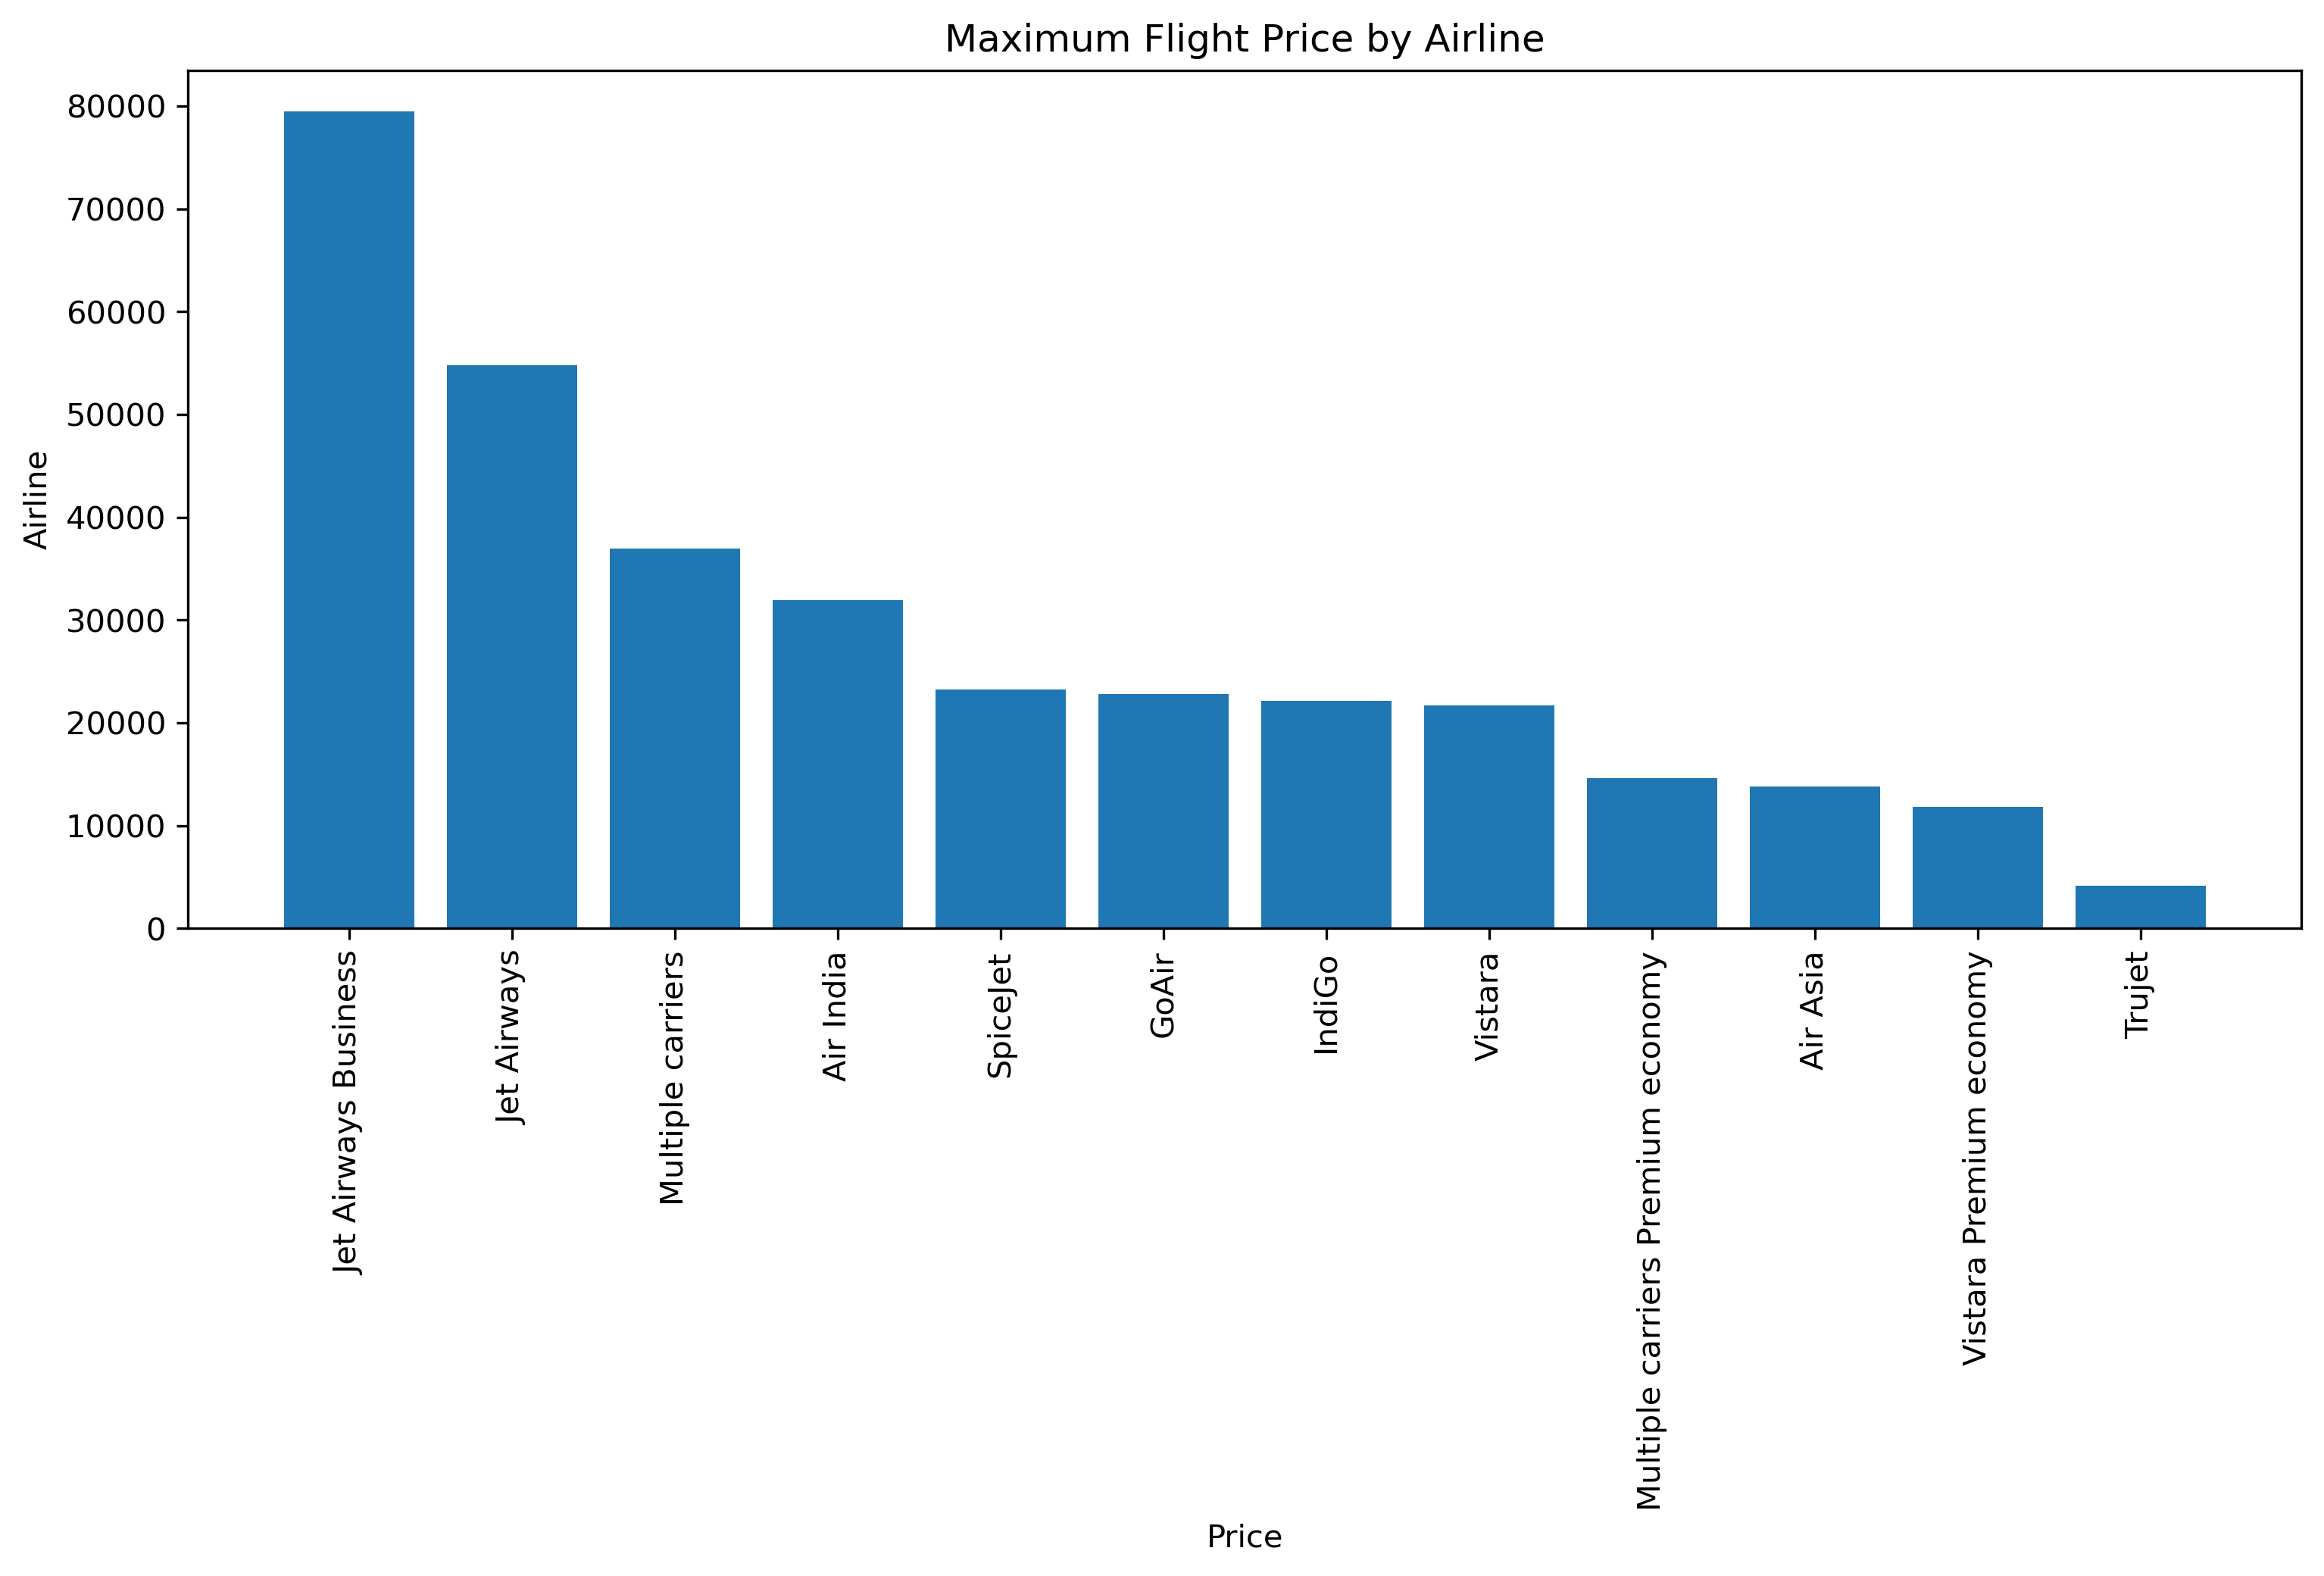

In [12]:
plt.figure(figsize=(12,5),dpi=300)
plt.bar(airlines_df.index, airlines_df['Price'])

plt.xlabel('Price')
plt.xticks(rotation=90)
plt.ylabel('Airline')
plt.title('Maximum Flight Price by Airline')
plt.show()

### Airlines vs ticket price using Seaborn Library

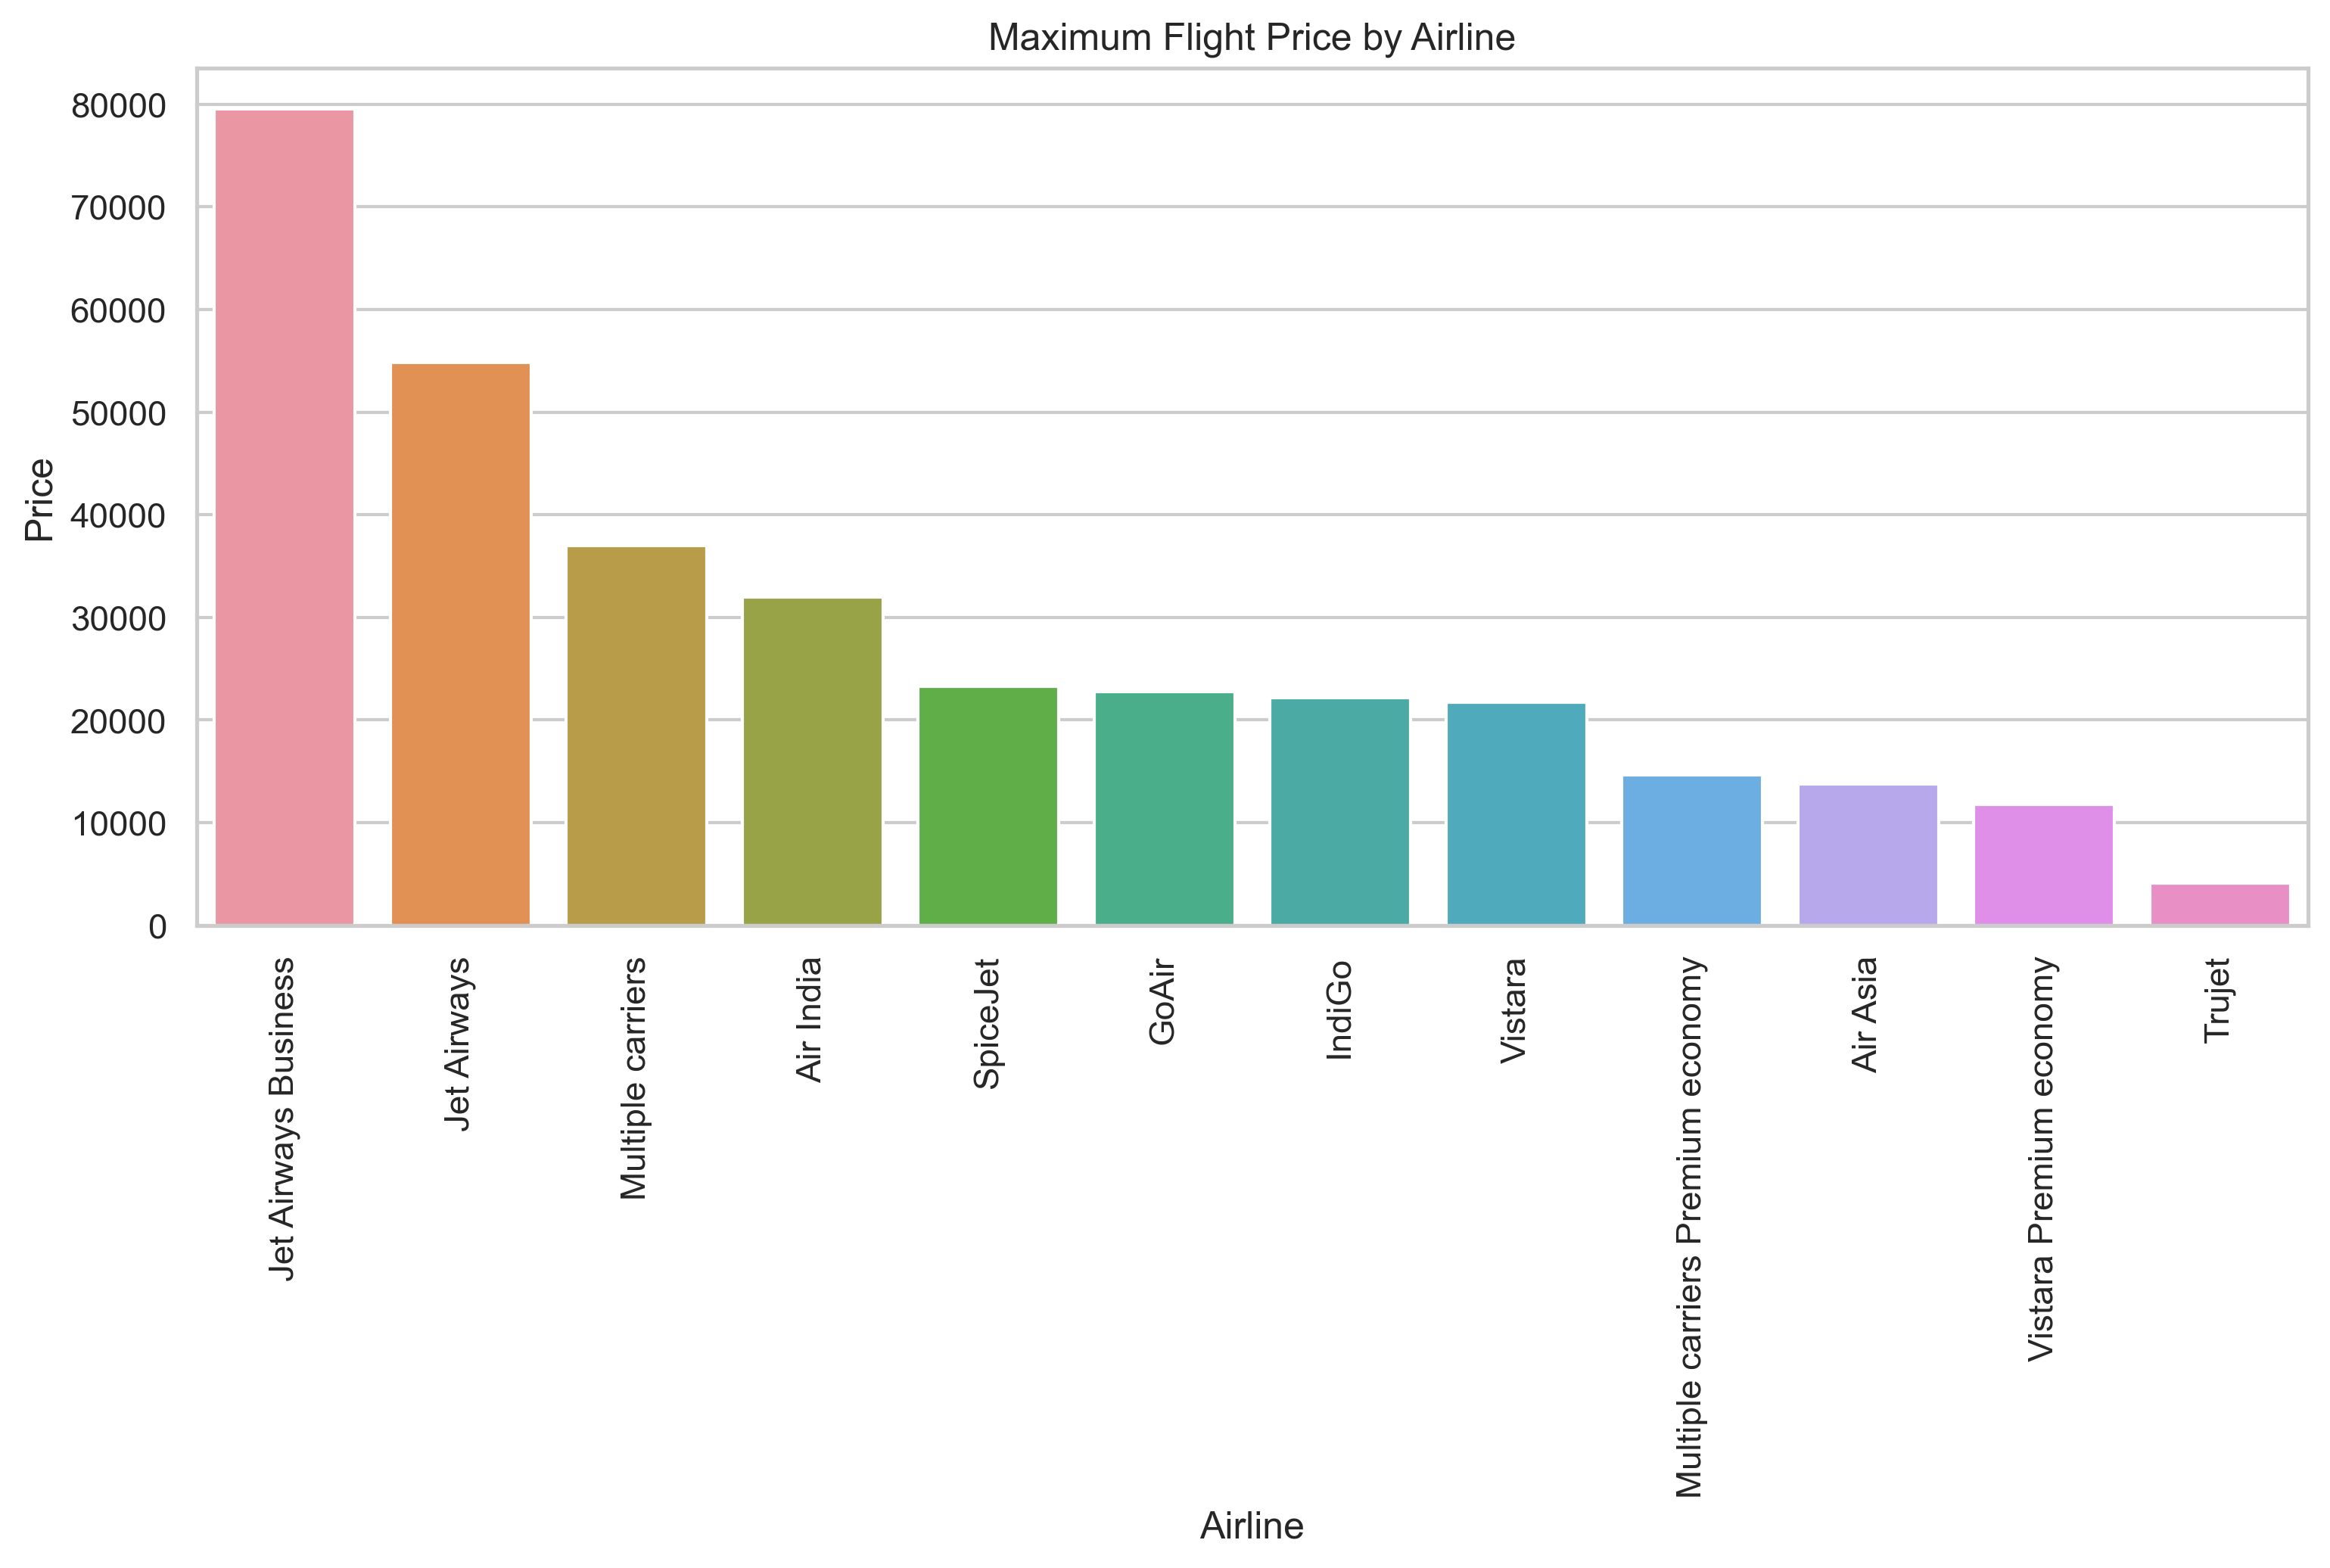

In [13]:
# Setting up the Seaborn plot style
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(12, 5), dpi=300)
sns.barplot(x=airlines_df.index, y='Price', data=airlines_df)

# Adding labels and title
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Maximum Flight Price by Airline')

plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

### Airlines vs ticket price using plotly Library

In [14]:
import plotly.express as px

# Creating a DataFrame from the groupby result and sorting it in descending order and resetting the index for plotly Library
airlines_df = airlines.to_frame().sort_values('Price', ascending=False).reset_index()

# Creating the bar plot using Plotly
fig = px.bar(airlines_df, x='Price', y='Airline', orientation='h', title='Maximum Flight Price by Airline', color='Airline')

fig.update_layout(height=500, width=900) # Adjusting the figure size
fig.show()

# 5. Cleaning the data

In [15]:
flight_df.head(3)

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0

### Cleaning Date_of_Journey column

In [16]:
flight_df['Journey_date'] = flight_df['Date_of_Journey'].str.split("/").str[0].astype(int)

In [17]:
flight_df.head(3)

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0   
1    05:50         13:15   7h 25m     2 stops         No info   7662.0   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0   

   Journey_date  
0            24  
1             1  
2             9

In [18]:
flight_df['Journey_month'] = flight_df['Date_of_Journey'].str.split("/").str[1].astype(int)
flight_df['Journey_year'] = flight_df['Date_of_Journey'].str.split("/").str[2].astype(int)
flight_df.head(3)

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0   
1    05:50         13:15   7h 25m     2 stops         No info   7662.0   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0   

   Journey_date  Journey_month  Journey_year  
0            24              3          2019  
1             1              5          2019  
2             9              6          2019

In [19]:
flight_df['Journey_year'].unique()

array([2019])

In [20]:
# drop journey_year column(Because all data is from 2019)
flight_df = flight_df.drop(['Journey_year'],axis=1)

In [21]:
# drop Date_of_Journey column
flight_df = flight_df.drop(['Date_of_Journey'],axis=1)

### Cleaning Total_Stops column

In [22]:
flight_df.head(3)

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   

   Arrival_Time Duration Total_Stops Additional_Info    Price  Journey_date  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897.0            24   
1         13:15   7h 25m     2 stops         No info   7662.0             1   
2  04:25 10 Jun      19h     2 stops         No info  13882.0             9   

   Journey_month  
0              3  
1              5  
2              6

In [23]:
flight_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [24]:
 # removing stop words
flight_df['Total_Stops'] = flight_df['Total_Stops'].str.split(" ").str[0]

In [25]:
# removing stop words
flight_df['Total_Stops'] = flight_df['Total_Stops'].replace("non-stop","0")

In [26]:
flight_df.head(3)

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   

   Arrival_Time Duration Total_Stops Additional_Info    Price  Journey_date  \
0  01:10 22 Mar   2h 50m           0         No info   3897.0            24   
1         13:15   7h 25m           2         No info   7662.0             1   
2  04:25 10 Jun      19h           2         No info  13882.0             9   

   Journey_month  
0              3  
1              5  
2              6

### Cleaning Time Columns from Dataset

#### Cleaning Arrival_Time Column

In [27]:
flight_df["Arrival_Time"] = flight_df["Arrival_Time"].str.split(" ").str[0]
flight_df["Arrival_hour"] = flight_df["Arrival_Time"].str.split(":").str[0].astype(int)
flight_df["Arrival_min"] = flight_df["Arrival_Time"].str.split(":").str[1].astype(int)

In [28]:
flight_df = flight_df.drop(["Arrival_Time"],axis=1)

In [29]:
flight_df.head(3)

Airline    Source Destination                  Route Dep_Time Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25      19h   

  Total_Stops Additional_Info    Price  Journey_date  Journey_month  \
0           0         No info   3897.0            24              3   
1           2         No info   7662.0             1              5   
2           2         No info  13882.0             9              6   

   Arrival_hour  Arrival_min  
0             1           10  
1            13           15  
2             4           25

#### Cleaning Departure_Time Column

In [30]:
flight_df["Dep_hour"] = flight_df["Dep_Time"].str.split(":").str[0].astype(int)
flight_df["Dep_min"] = flight_df["Dep_Time"].str.split(":").str[1].astype(int)
flight_df = flight_df.drop(['Dep_Time'],axis=1)

In [31]:
flight_df.head(3)

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   

  Total_Stops Additional_Info    Price  Journey_date  Journey_month  \
0           0         No info   3897.0            24              3   
1           2         No info   7662.0             1              5   
2           2         No info  13882.0             9              6   

   Arrival_hour  Arrival_min  Dep_hour  Dep_min  
0             1           10        22       20  
1            13           15         5       50  
2             4           25         9       25

In [32]:
flight_df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [33]:
flight_df.head(3)

Airline    Source Destination Duration Total_Stops    Price  \
0       IndiGo  Banglore   New Delhi   2h 50m           0   3897.0   
1    Air India   Kolkata    Banglore   7h 25m           2   7662.0   
2  Jet Airways     Delhi      Cochin      19h           2  13882.0   

   Journey_date  Journey_month  Arrival_hour  Arrival_min  Dep_hour  Dep_min  
0            24              3             1           10        22       20  
1             1              5            13           15         5       50  
2             9              6             4           25         9       25

In [34]:
flight_df["Duration_hr"] = flight_df["Duration"].str.split("h").str[0]

In [35]:
flight_df.head(3)

Airline    Source Destination Duration Total_Stops    Price  \
0       IndiGo  Banglore   New Delhi   2h 50m           0   3897.0   
1    Air India   Kolkata    Banglore   7h 25m           2   7662.0   
2  Jet Airways     Delhi      Cochin      19h           2  13882.0   

   Journey_date  Journey_month  Arrival_hour  Arrival_min  Dep_hour  Dep_min  \
0            24              3             1           10        22       20   
1             1              5            13           15         5       50   
2             9              6             4           25         9       25   

  Duration_hr  
0           2  
1           7  
2          19

In [36]:
flight_df["Duration_hr"].str.contains("m").sum()

2

In [37]:
flight_df[flight_df["Duration_hr"].str.contains("m")]

Airline  Source Destination Duration Total_Stops    Price  \
6474  Air India  Mumbai   Hyderabad       5m           2  17327.0   
2660  Air India  Mumbai   Hyderabad       5m           2      NaN   

      Journey_date  Journey_month  Arrival_hour  Arrival_min  Dep_hour  \
6474             6              3            16           55        16   
2660            12              3            16           55        16   

      Dep_min Duration_hr  
6474       50          5m  
2660       50          5m

In [38]:
flight_df['Duration_hr'] = flight_df['Duration_hr'].replace("5m","0")

In [39]:
flight_df['Duration_min'] = flight_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [40]:
flight_df['Duration_min'].fillna('0',inplace=True)

In [41]:
flight_df.head(3)

Airline    Source Destination Duration Total_Stops    Price  \
0       IndiGo  Banglore   New Delhi   2h 50m           0   3897.0   
1    Air India   Kolkata    Banglore   7h 25m           2   7662.0   
2  Jet Airways     Delhi      Cochin      19h           2  13882.0   

   Journey_date  Journey_month  Arrival_hour  Arrival_min  Dep_hour  Dep_min  \
0            24              3             1           10        22       20   
1             1              5            13           15         5       50   
2             9              6             4           25         9       25   

  Duration_hr Duration_min  
0           2           50  
1           7           25  
2          19            0

#### Converting Hours into minute and also adding both for total minute

In [42]:
flight_df['Duration'] = flight_df['Duration_hr'].astype(int)*60 + flight_df['Duration_min'].astype(int)

In [43]:
flight_df.drop(['Duration_hr','Duration_min'],axis=1, inplace=True)

In [44]:
flight_df.head(3)

Airline    Source Destination  Duration Total_Stops    Price  \
0       IndiGo  Banglore   New Delhi       170           0   3897.0   
1    Air India   Kolkata    Banglore       445           2   7662.0   
2  Jet Airways     Delhi      Cochin      1140           2  13882.0   

   Journey_date  Journey_month  Arrival_hour  Arrival_min  Dep_hour  Dep_min  
0            24              3             1           10        22       20  
1             1              5            13           15         5       50  
2             9              6             4           25         9       25

### Handling Null values

In [45]:
flight_df.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         1
Price            2671
Journey_date        0
Journey_month       0
Arrival_hour        0
Arrival_min         0
Dep_hour            0
Dep_min             0
dtype: int64

#### Handling Null values in 'Total_Stops' Column

In [46]:
flight_df['Total_Stops'].value_counts()

1    7056
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

In [47]:
flight_df['Total_Stops'] = flight_df['Total_Stops'].fillna('1')
flight_df['Total_Stops'].dtype

dtype('O')

In [48]:
flight_df['Total_Stops'] = flight_df['Total_Stops'].astype(int)

In [49]:
flight_df['Total_Stops'].dtype

dtype('int32')

#### Handling Null values in 'Price' Column

(array([6.029e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <BarContainer object of 10 artists>)

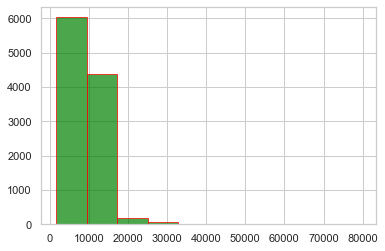

In [50]:
plt.hist(flight_df.Price,color='green',edgecolor='red', alpha = 0.7)

In [51]:
flight_df.Price.mean()

9087.064120565385

In [52]:
flight_df.Price.median()

8372.0

In [53]:
flight_df['Price'].fillna(flight_df['Price'].mean(),inplace = True)

In [54]:
flight_df.head(3)

Airline    Source Destination  Duration  Total_Stops    Price  \
0       IndiGo  Banglore   New Delhi       170            0   3897.0   
1    Air India   Kolkata    Banglore       445            2   7662.0   
2  Jet Airways     Delhi      Cochin      1140            2  13882.0   

   Journey_date  Journey_month  Arrival_hour  Arrival_min  Dep_hour  Dep_min  
0            24              3             1           10        22       20  
1             1              5            13           15         5       50  
2             9              6             4           25         9       25

In [55]:
flight_df['Price'].isnull().sum()

0

In [56]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        13354 non-null  object 
 1   Source         13354 non-null  object 
 2   Destination    13354 non-null  object 
 3   Duration       13354 non-null  int32  
 4   Total_Stops    13354 non-null  int32  
 5   Price          13354 non-null  float64
 6   Journey_date   13354 non-null  int32  
 7   Journey_month  13354 non-null  int32  
 8   Arrival_hour   13354 non-null  int32  
 9   Arrival_min    13354 non-null  int32  
 10  Dep_hour       13354 non-null  int32  
 11  Dep_min        13354 non-null  int32  
dtypes: float64(1), int32(8), object(3)
memory usage: 939.0+ KB


## Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

In [58]:
for i in ["Airline","Source","Destination"]:
    flight_df[i] = la.fit_transform(flight_df[i])
flight_df.head(3)

Airline  Source  Destination  Duration  Total_Stops    Price  Journey_date  \
0        3       0            5       170            0   3897.0            24   
1        1       3            0       445            2   7662.0             1   
2        4       2            1      1140            2  13882.0             9   

   Journey_month  Arrival_hour  Arrival_min  Dep_hour  Dep_min  
0              3             1           10        22       20  
1              5            13           15         5       50  
2              6             4           25         9       25

#### Checking Relationship in the variables so we use Heatmap

<AxesSubplot:>

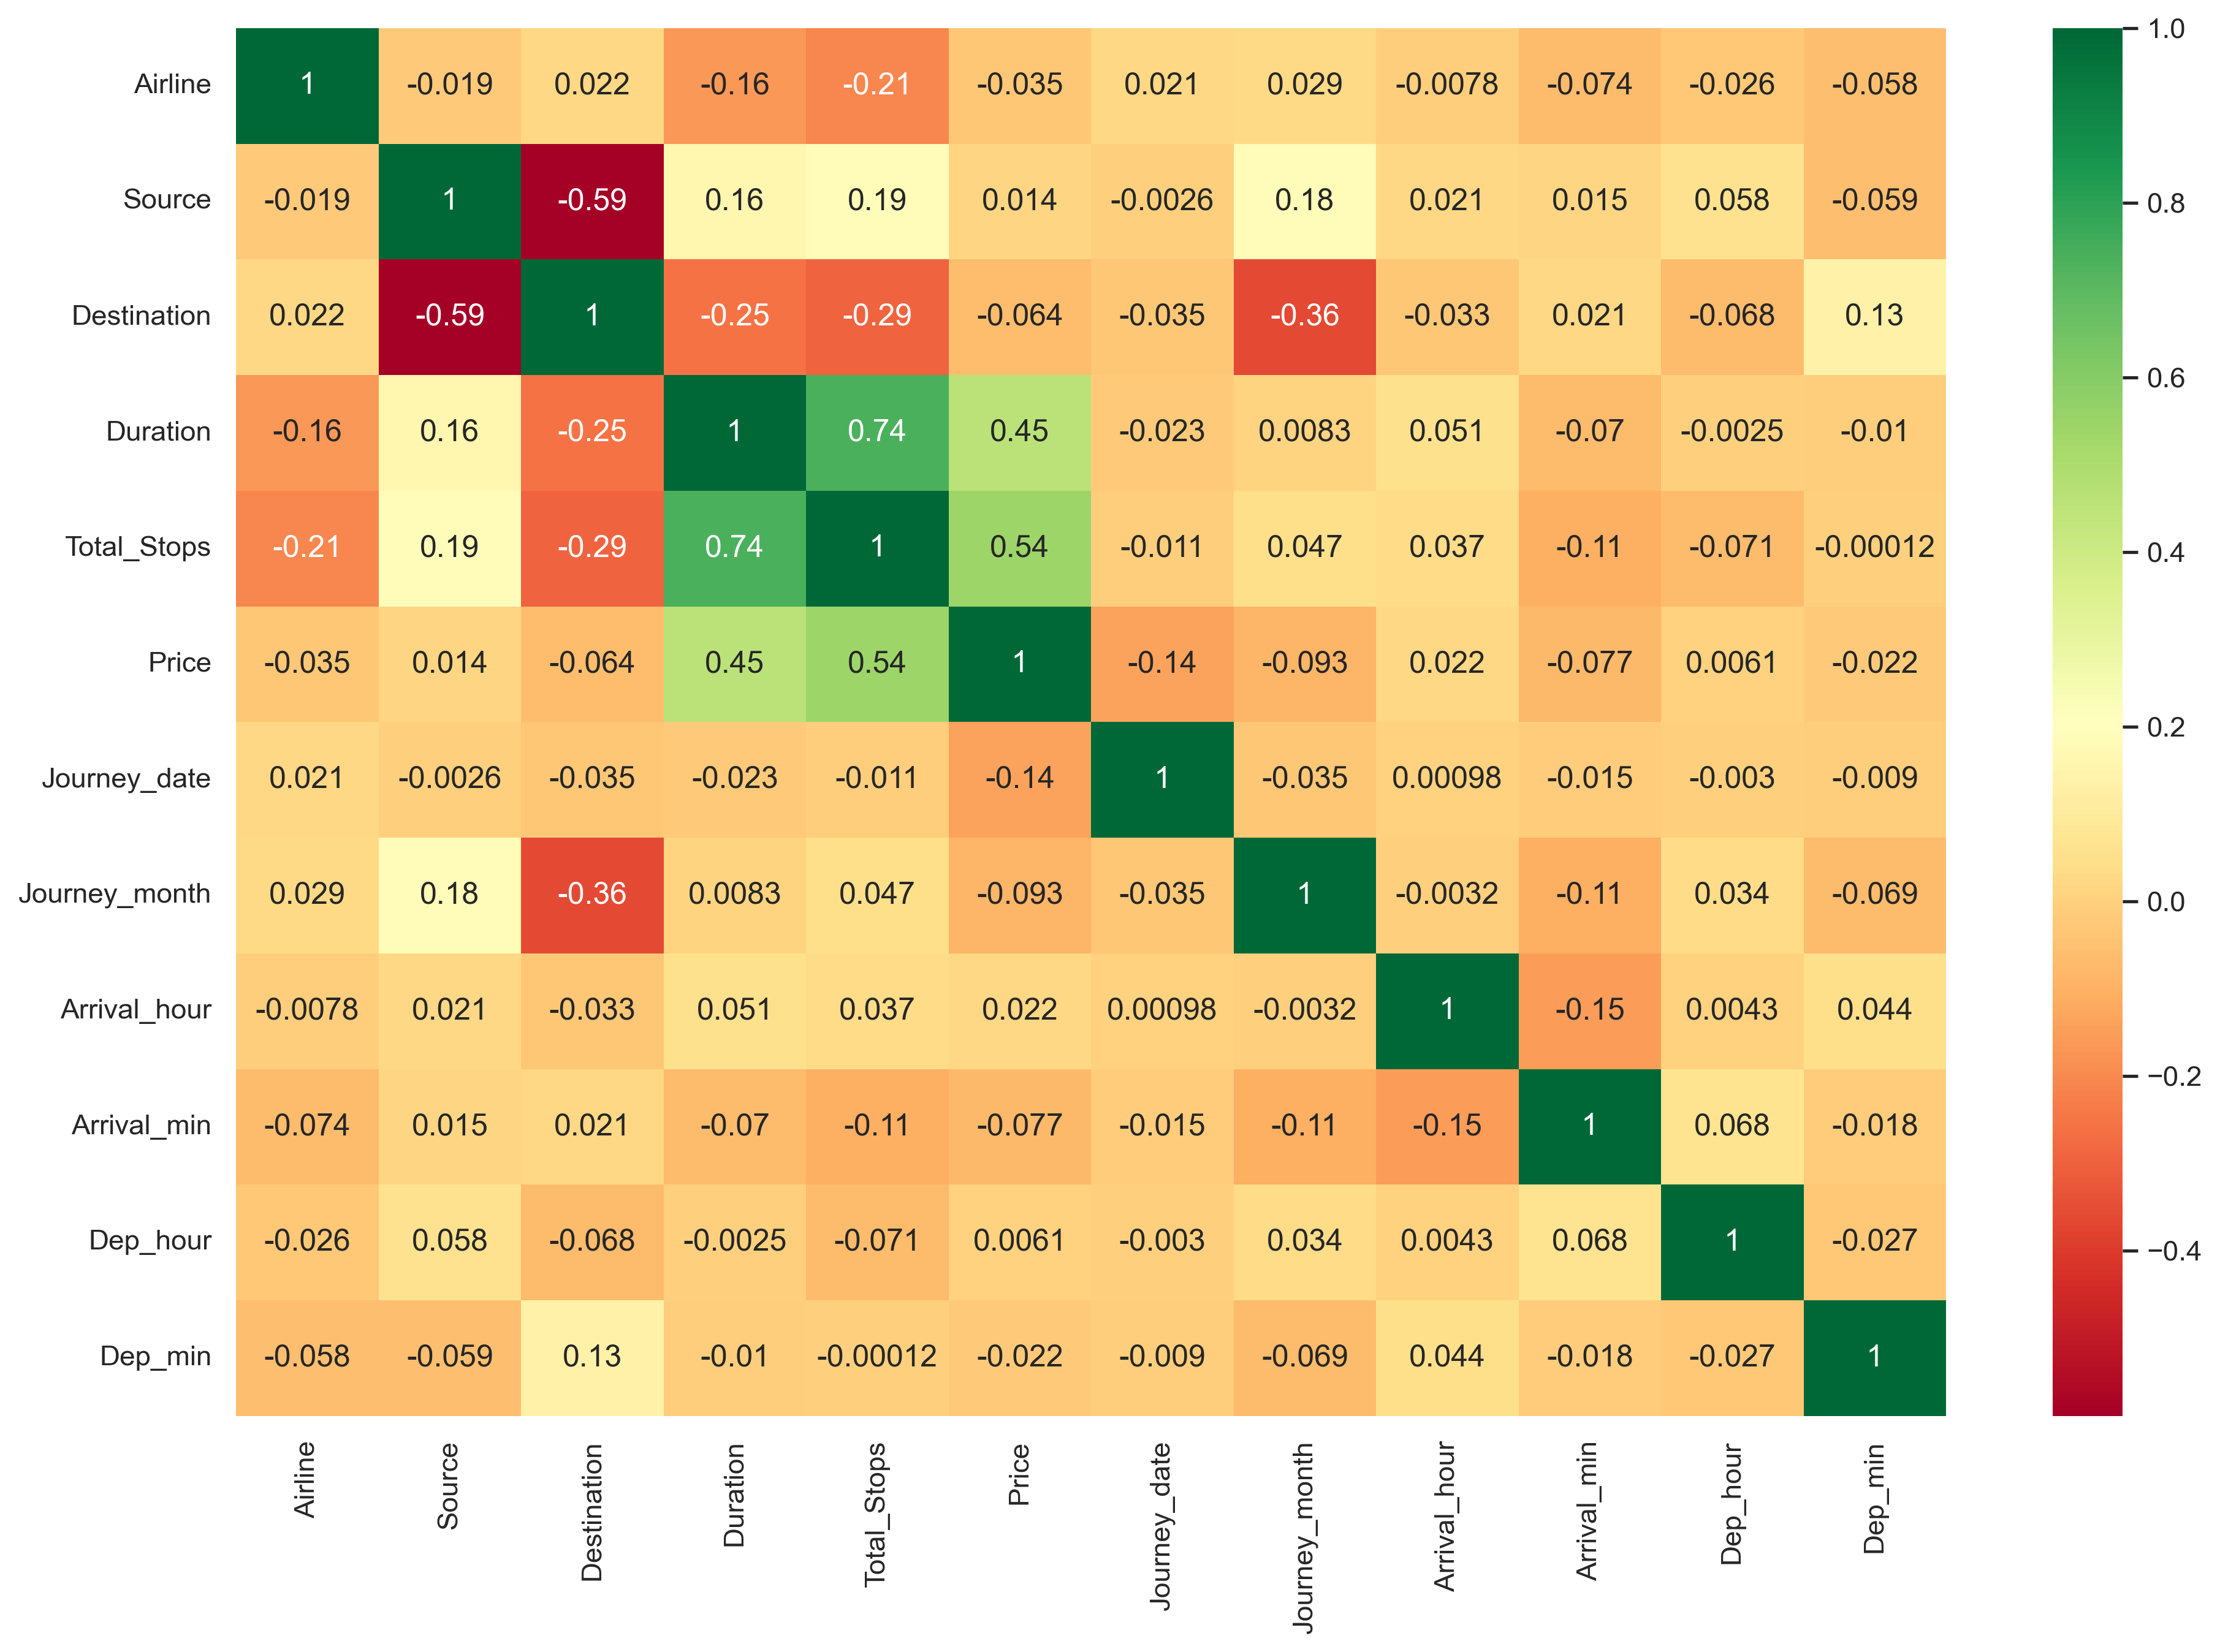

In [59]:
plt.figure(figsize=(15,10), dpi=300)
sns.heatmap(flight_df.corr(),annot=True,cmap="RdYlGn")

## Machine Learning Model

### segregating dataset into train and test set

In [60]:
train_df = flight_df[0:10683]
test_df = flight_df[10683:]

In [61]:
train_df

Airline  Source  Destination  Duration  Total_Stops    Price  \
0            3       0            5       170            0   3897.0   
1            1       3            0       445            2   7662.0   
2            4       2            1      1140            2  13882.0   
3            3       3            0       325            1   6218.0   
4            3       0            5       285            1  13302.0   
...        ...     ...          ...       ...          ...      ...   
10678        0       3            0       150            0   4107.0   
10679        1       3            0       155            0   4145.0   
10680        4       0            2       180            0   7229.0   
10681       10       0            5       160            0  12648.0   
10682        1       2            1       500            2  11753.0   

       Journey_date  Journey_month  Arrival_hour  Arrival_min  Dep_hour  \
0                24              3             1           10        22   
1                 1              5            13           15         5   
2                 9              6             4           25         9   
3                12              5            23           30        18   
4                 1              3            21           35        16   
...             ...            ...           ...          ...       ...   
10678             9              4            22           25        19   
10679            27              4            23           20        20   
10680            27              4            11           20         8   
10681             1              3            14           10        11   
10682             9              5            19           15        10   

       Dep_min  
0           20  
1           50  
2           25  
3            5  
4           50  
...        ...  
10678       55  
10679       45  
10680       20  
10681       30  
10682       55  

[10683 rows x 12 columns]

In [62]:
test_df

Airline  Source  Destination  Duration  Total_Stops        Price  \
0           4       2            1       655            1  9087.064121   
1           3       3            0       240            1  9087.064121   
2           4       2            1      1425            1  9087.064121   
3           6       2            1       780            1  9087.064121   
4           0       0            2       170            0  9087.064121   
...       ...     ...          ...       ...          ...          ...   
2666        1       3            0      1435            1  9087.064121   
2667        3       3            0       155            0  9087.064121   
2668        4       2            1       395            1  9087.064121   
2669        1       2            1       915            1  9087.064121   
2670        6       2            1       860            1  9087.064121   

      Journey_date  Journey_month  Arrival_hour  Arrival_min  Dep_hour  \
0                6              6             4           25        17   
1               12              5            10           20         6   
2               21              5            19            0        19   
3               21              5            21            0         8   
4               24              6             2           45        23   
...            ...            ...           ...          ...       ...   
2666             6              6            20           25        20   
2667            27              3            16           55        14   
2668             6              3             4           25        21   
2669             6              3            19           15         4   
2670            15              6            19           15         4   

      Dep_min  
0          30  
1          20  
2          15  
3           0  
4          55  
...       ...  
2666       30  
2667       20  
2668       50  
2669        0  
2670       55  

[2671 rows x 12 columns]

### splitting dataset into x (independent variable) and y (dependent variable)

In [63]:
x = train_df.drop(['Price'],axis = 1)
y = train_df.loc[:,['Price']].values

In [64]:
x

Airline  Source  Destination  Duration  Total_Stops  Journey_date  \
0            3       0            5       170            0            24   
1            1       3            0       445            2             1   
2            4       2            1      1140            2             9   
3            3       3            0       325            1            12   
4            3       0            5       285            1             1   
...        ...     ...          ...       ...          ...           ...   
10678        0       3            0       150            0             9   
10679        1       3            0       155            0            27   
10680        4       0            2       180            0            27   
10681       10       0            5       160            0             1   
10682        1       2            1       500            2             9   

       Journey_month  Arrival_hour  Arrival_min  Dep_hour  Dep_min  
0                  3             1           10        22       20  
1                  5            13           15         5       50  
2                  6             4           25         9       25  
3                  5            23           30        18        5  
4                  3            21           35        16       50  
...              ...           ...          ...       ...      ...  
10678              4            22           25        19       55  
10679              4            23           20        20       45  
10680              4            11           20         8       20  
10681              3            14           10        11       30  
10682              5            19           15        10       55  

[10683 rows x 11 columns]

In [65]:
y

array([[ 3897.],
       [ 7662.],
       [13882.],
       ...,
       [ 7229.],
       [12648.],
       [11753.]])

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### importing models

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### function to train the models

In [68]:
def predict(algorithm):
    print("Algorithm:",algorithm)
    model = algorithm.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("The predicted values are:",y_pred)
    r2 = r2_score(y_test,y_pred)
    print("r2_score",r2)
    print("MAE",(mean_absolute_error(y_test,y_pred)))
    print("MSE",(mean_squared_error(y_test,y_pred)))
    return(r2)

### KNN Algorithm

In [69]:
knn = predict(KNeighborsRegressor())

Algorithm: KNeighborsRegressor()
The predicted values are: [[ 8399.4]
 [ 3843.4]
 [10933. ]
 ...
 [14808.8]
 [ 6443.2]
 [ 6902.4]]
r2_score 0.5877402465573127
MAE 1769.717334331711
MSE 8589446.182089105


### Decision Tree Algorithm

In [70]:
dt = predict(DecisionTreeRegressor())

Algorithm: DecisionTreeRegressor()
The predicted values are: [ 7048.  3857. 10991. ... 14441.  7229.  5842.]
r2_score 0.6263910192831831
MAE 1438.676538125546
MSE 7784155.9992549615


### Random Forest Algorithm

In [71]:
rf = predict(RandomForestRegressor())

Algorithm: RandomForestRegressor()
The predicted values are: [ 6966.84        3830.91133333 11590.74       ... 14226.21016667
  6723.63866667  6177.56      ]
r2_score 0.7981461900629498
MAE 1192.9353314071427
MSE 4205631.092109434


### hyperparameter tuning

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
random_search = {'n_estimators':[100,120,150,180,200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20]}
rf_regressor = RandomForestRegressor()
rf_model = RandomizedSearchCV(estimator = rf_regressor, param_distributions=random_search,cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [74]:
rf_model.best_params_

{'n_estimators': 220, 'max_features': 'sqrt', 'max_depth': 15}

In [75]:
pred = rf_model.predict(x_test)
r2_score(y_test,pred)

0.8144645504163042

# Saving the Model

In [77]:
import pickle
file = open('flight_model.pkl','wb')  #wb = write in binary mode
pickle.dump(rf_model,file)

In [78]:
model = open('flight_model.pkl','rb')  #rb = read in binary mode
forest = pickle.load(model)

In [80]:
forest.predict(x_test)

array([ 6736.93858672,  3846.41659484, 11603.2634001 , ...,
       14271.34099133,  6785.95169674,  6627.25220206])